<center>Заметка 1. 	Анализ зависимостей.</center>
<center>курса <q>Прикладной статистический анализ данных</q>.</center>
<center>Версия 1</center>

# Успеваемость первокурсников

Для 600 первокурсников известны показатели успеваемости по четырём предметам и результаты трёх психологических тестов. 

Как связаны эти два набора переменных?

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix

In [3]:
df = pd.read_csv('mmreg.csv', sep = ',')
df.head()

,locus_of_control,self_concept,motivation,read,write,math,science
0,-0.84,-0.24,1.00,54.8,64.5,44.5,52.6
1,-0.38,-0.47,0.67,62.7,43.7,44.7,52.6
2,0.89,0.59,0.67,60.6,56.7,70.5,58.0
3,0.71,0.28,0.67,62.7,56.7,54.7,58.0
4,-0.64,0.03,1.00,41.6,46.3,38.4,36.3


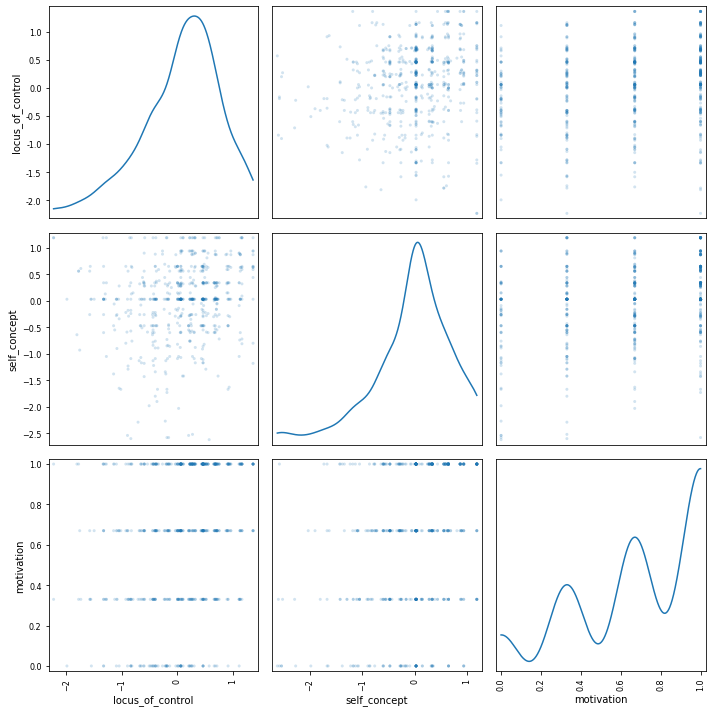

In [4]:
psych = df.iloc[:,0:3]
pd.plotting.scatter_matrix(psych, alpha=0.2, figsize = (10,10), diagonal='kde')
plt.tight_layout()
plt.savefig('scatter_matrix.png')

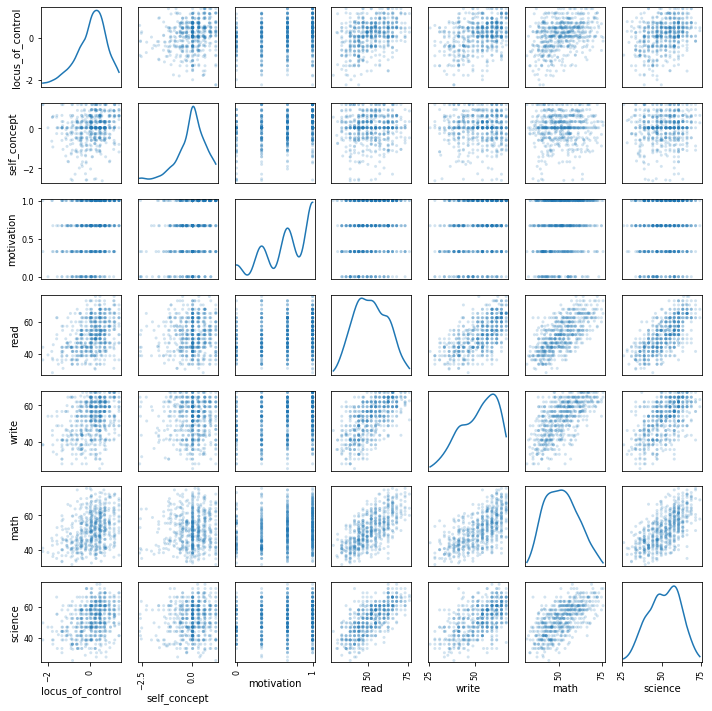

In [5]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize = (10,10), diagonal='kde')
plt.tight_layout()

Визуализируйте попарные корреляции Пирсона с помощью функции `heatmap` из пакета `seaborn`,
предаварительно посчитав их с помощью функции `corr` из пакета `pandas`.  Воспользуйтесь функцией `pearsonr` из `scipy.stats` для подсчета p-value.

Визуализируйте попарные корреляции Спирмена с помощью функции `heatmap` из пакета `seaborn`, предаварительно посчитав их с помощью функции функции `corr` из пакета `pandas`. Воспользуйтесь функцией `spearmanr` из `scipy.stats` для подсчета p-value.

Визуализируйте попарные корреляции Кендалла с помощью функции `heatmap` из пакета `seaborn`, предаварительно посчитав их с помощью функции функции `corr` из пакета `pandas`. Воспользуйтесь функцией `kendalltau` из `scipy.stats` для подсчета p-value.

Если вам не нужна полноценная матрица всевозможных корреляций, а нужна только попарная корреляция некоторых групп, гораздо удобнее воспользоваться станадртной функцией `pairplot` из `seaborn`. Примените функцию `pairplot` для любой из пар признаков, для которых `scipy.stats` выдает нулевое p-value. 

# Частная корреляция

С помощью функции `pcorr`  из пакета `pingouin`  получите значения частных корреляций попарно между всеми переменными (при условии всех остальных) и сравните получившуюся матрицу с обычными попарными корреляциями, которые вы получили ранее. 

Кроме частной корреляции есть еще так называемая получастная (semi partial correlation).
На практике такая корреляция используется редко, но концептуально это та же самая корреляция, только теперь вместо одного  (и только одного) из признаков рассматривются отстаки от регрессии этого признака на какой-то другой признак (по которому мы берем условие). Подобные извращения также доступны для функции `partial_corr` с помощью настройки `x_covar`, `y_covar`. 

## Коэффициент Лина (Concordance correlation coefficient)

Реализуйте функцию вычисляющую коэффициент Лина и примините для любой из пар признаков. Целесообразно ли его использование?